# **Overstimulation Behavior and Lifestyle Analysis**
## **Author:** 
## **Date:** 

## **Library Installation**

In [40]:
!pip install pandas matplotlib numpy seaborn scikit-learn imblearn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Library Importation**

In [45]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from scipy.stats import ttest_ind
from scipy.stats import pearsonr


## **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv('overstimulation_dataset.csv')  
print("Original Shape:", df.shape)

Original Shape: (2000, 20)


#### This indicates that the dataset contains **2,000 rows** and **20 columns**.

In [25]:
df.head()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
0,56.0,7.767825,4.908517,2.0,0.0,8.0,11.0,2.054411,4.0,0.0,6.0,8.0,3.0,1.0,1.0,8.0,1.0,2.0,8.746524,0.0
1,46.0,4.270068,8.413936,9.0,4.0,4.0,10.0,2.513216,3.0,1.0,4.0,4.0,2.0,1.0,5.0,5.0,2.0,4.0,8.508448,1.0
2,32.0,6.676144,1.688213,5.0,2.0,8.0,12.0,2.123108,2.0,1.0,4.0,3.0,2.0,1.0,8.0,7.0,2.0,4.0,5.701592,0.0
3,25.0,7.963324,3.315576,7.0,2.0,8.0,13.0,1.217663,3.0,1.0,3.0,4.0,0.0,1.0,4.0,4.0,2.0,1.0,9.131087,0.0
4,38.0,3.748138,9.899260,5.0,0.0,5.0,4.0,0.093407,4.0,0.0,9.0,4.0,0.0,1.0,2.0,9.0,5.0,3.0,2.286433,1.0


## **Data Cleaning & Wrangling**

In [7]:
# Checking & Handle Missing Values (Imputation)
def impute_missing_values(df):
    """
    Checks for missing values and imputes them:
    - Numeric columns: filled with median
    - Object (categorical) columns: filled with mode
    
    Parameters:
        df (pd.DataFrame): The input DataFrame
    
    Returns:
        pd.DataFrame: DataFrame with imputed values (if missing values were found)
    """
    missing = df.isnull().sum()
    total_missing = missing.sum()
    
    if total_missing == 0:
        print("No missing values found in the dataset.")
    
    print("Missing values detected. Imputing now...\n")

    # Impute numeric columns with median
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)
    
    # Impute object (categorical) columns with mode
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mode()[0], inplace=True)

    print("Missing Values Have Been Replaced")

impute_missing_values(df)

No missing values found in the dataset.


In [9]:
## Checking & Handlling Duplicated Rows 
def handle_duplicates(df):
    """
    Checks for duplicate rows and removes them if found.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame
    
    Returns:
        pd.DataFrame: DataFrame with duplicates removed (if any)
    """
    duplicate_count = df.duplicated().sum()
    
    if duplicate_count == 0:
        print("No duplicate rows found in the dataset.")
    else:
        print(f"Duplicate rows detected: {duplicate_count}. Removing duplicates...")
        df.drop_duplicates(inplace=True)
        print("Duplicates removed.")
        print(f"New shape of dataset: {df.shape}")

handle_duplicates(df)

No duplicate rows found in the dataset.


In [10]:
## Detect & Treat Outliers (IQR Method)
def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Clip outliers
    data[column] = np.where(data[column] < lower, lower,
                            np.where(data[column] > upper, upper, data[column]))

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    treat_outliers_iqr(df, col)


## **Exploratory Data Analysis**

In [18]:
print(df.describe().T)
print("-" * 60)  
print(df.info())

                      count       mean        std        min        25%  \
Age                  2000.0  38.700000  12.070951  18.000000  28.000000   
Sleep_Hours          2000.0   6.501131   2.021518   3.000081   4.763518   
Screen_Time          2000.0   6.403858   3.143323   1.000338   3.714882   
Stress_Level         2000.0   4.989500   2.630371   1.000000   3.000000   
Noise_Exposure       2000.0   2.050500   1.431074   0.000000   1.000000   
Social_Interaction   2000.0   4.521000   2.847738   0.000000   2.000000   
Work_Hours           2000.0   8.920000   3.141741   4.000000   6.000000   
Exercise_Hours       2000.0   1.510789   0.862808   0.000356   0.760902   
Caffeine_Intake      2000.0   1.961000   1.429161   0.000000   1.000000   
Multitasking_Habit   2000.0   0.514500   0.499915   0.000000   0.000000   
Anxiety_Score        2000.0   4.909000   2.585549   1.000000   3.000000   
Depression_Score     2000.0   4.936500   2.538442   1.000000   3.000000   
Sensory_Sensitivity  2000

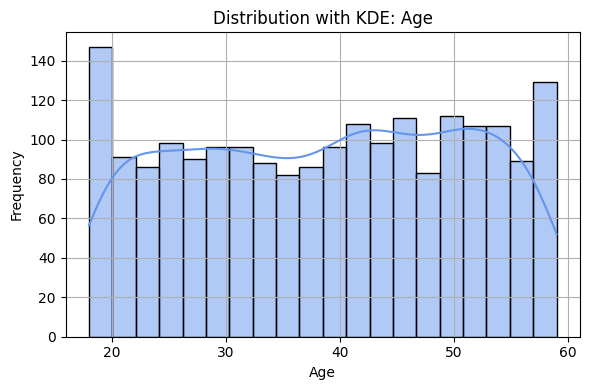

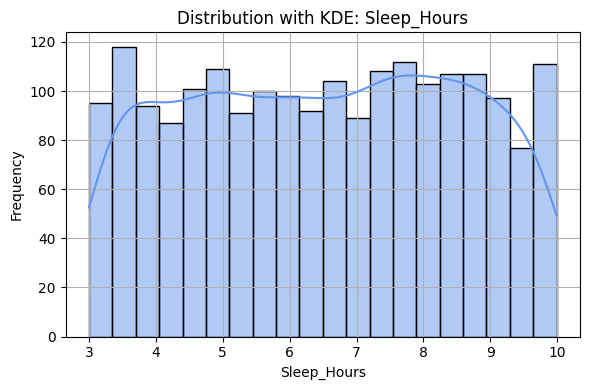

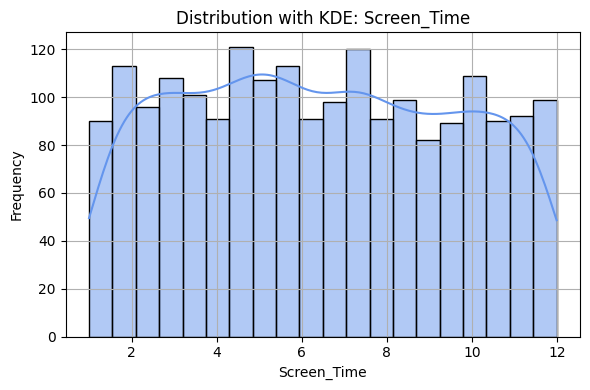

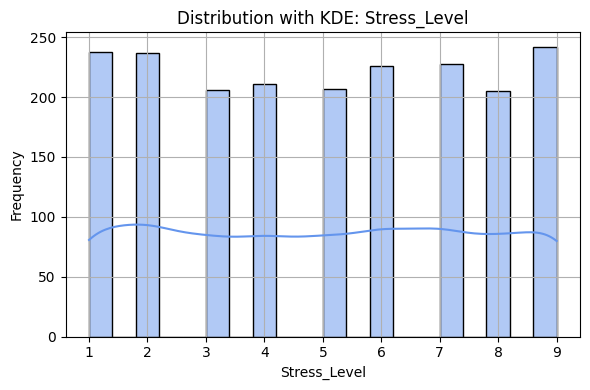

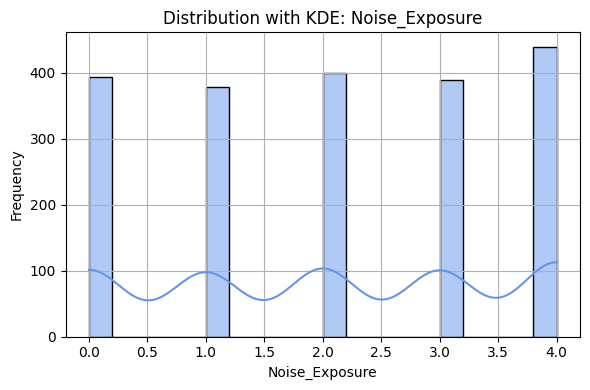

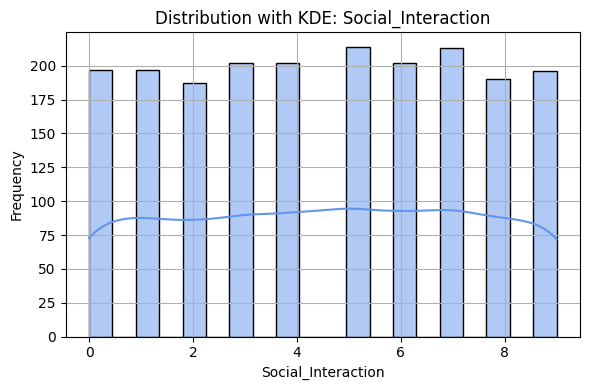

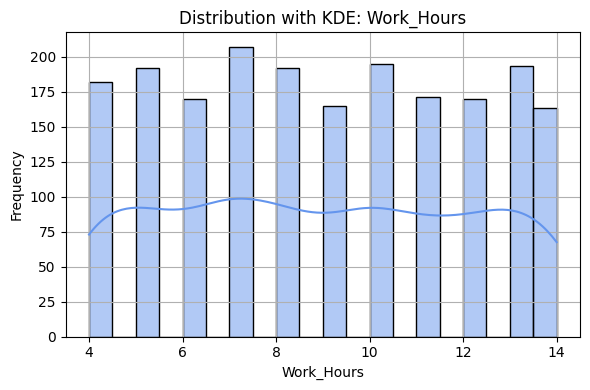

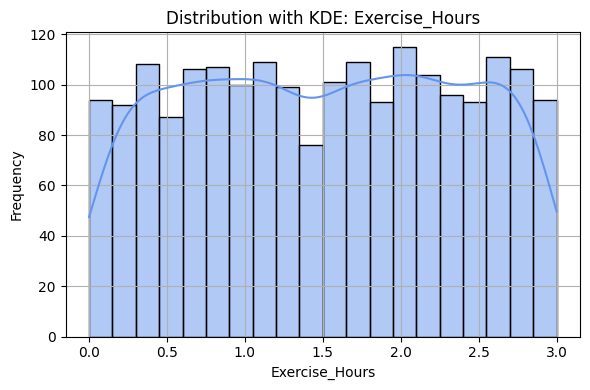

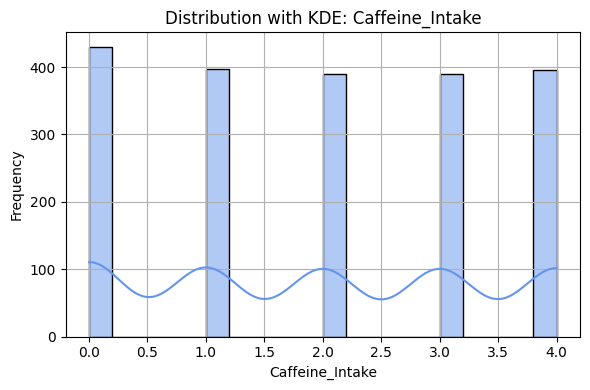

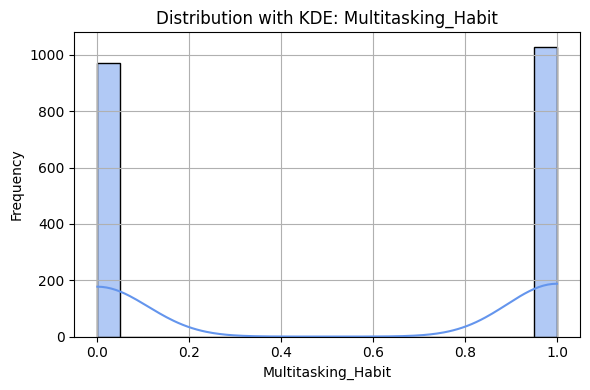

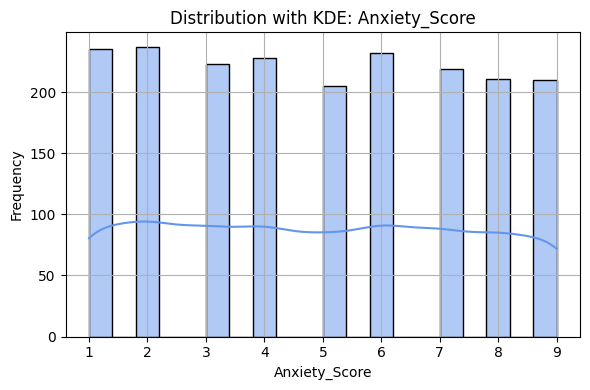

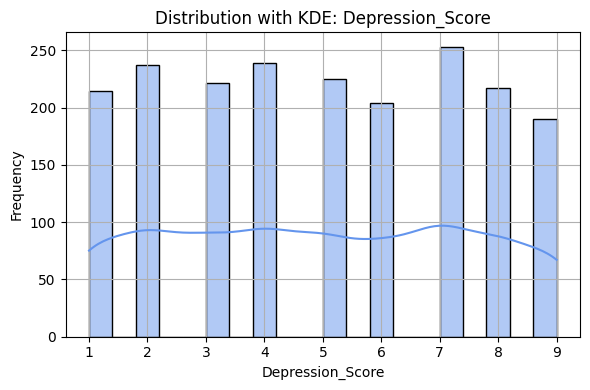

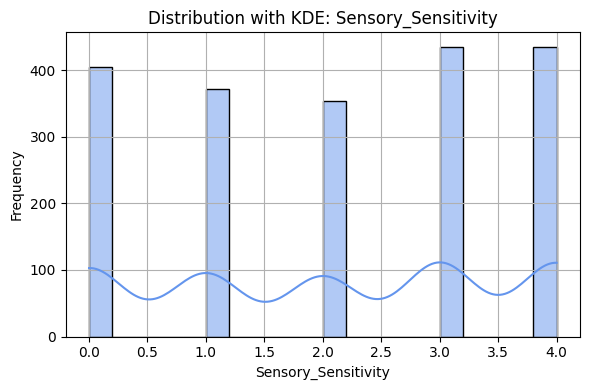

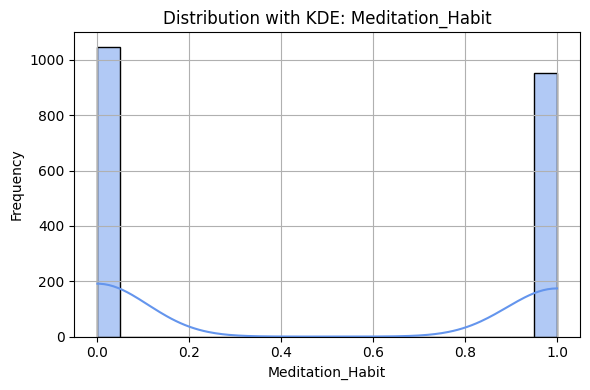

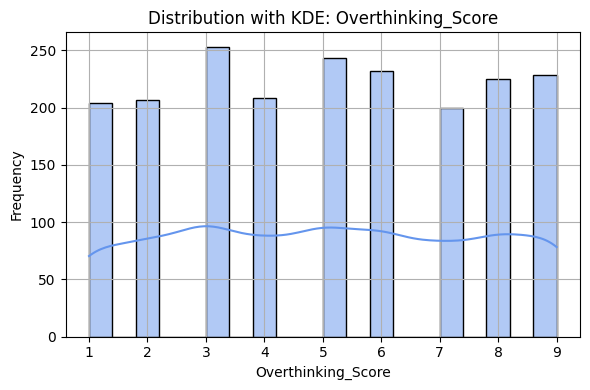

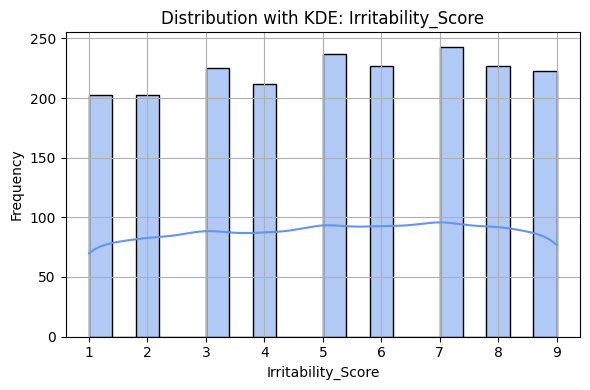

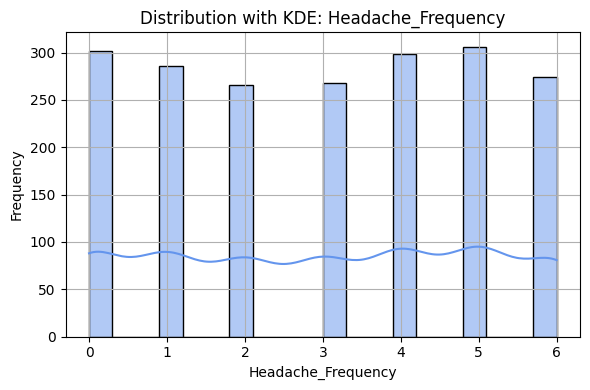

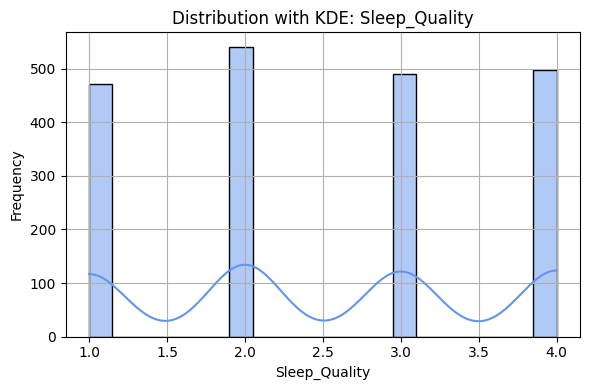

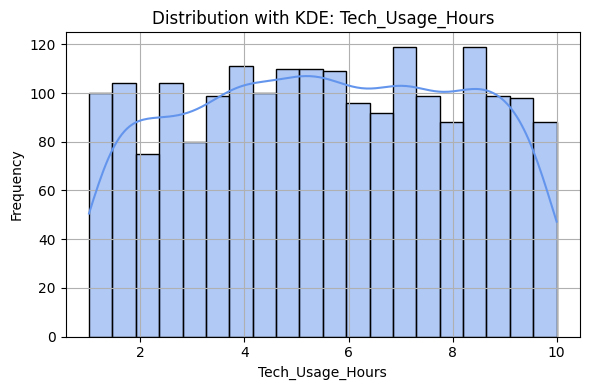

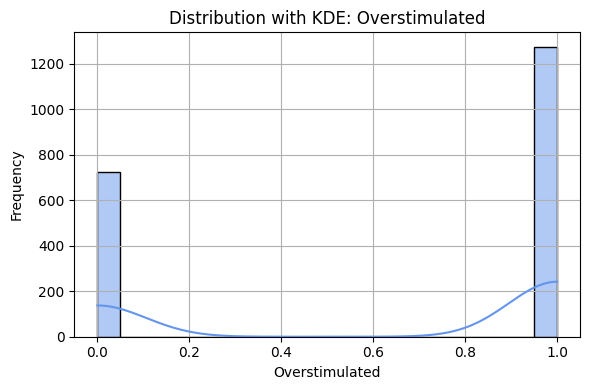

In [14]:
## Plot numeric distributions
def plot_numeric_distributions(df):
    """
    Plots individual histograms with KDE for each numeric column in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    """
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], bins=20, kde=True, color='cornflowerblue', edgecolor='black')
        plt.title(f"Distribution with KDE: {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_numeric_distributions(df)


Correlation Analysis Between Overstimulation and Other Features
Age                   -0.012540
Sleep_Hours           -0.402738
Screen_Time            0.445316
Stress_Level           0.277017
Noise_Exposure         0.028797
Social_Interaction    -0.012522
Work_Hours            -0.009603
Exercise_Hours        -0.010532
Caffeine_Intake       -0.006752
Multitasking_Habit    -0.002055
Anxiety_Score          0.021336
Depression_Score      -0.021327
Sensory_Sensitivity   -0.020701
Meditation_Habit      -0.038604
Overthinking_Score     0.003522
Irritability_Score     0.001465
Headache_Frequency     0.043190
Sleep_Quality         -0.010422
Tech_Usage_Hours       0.012978
Overstimulated         1.000000
Name: Overstimulated, dtype: float64



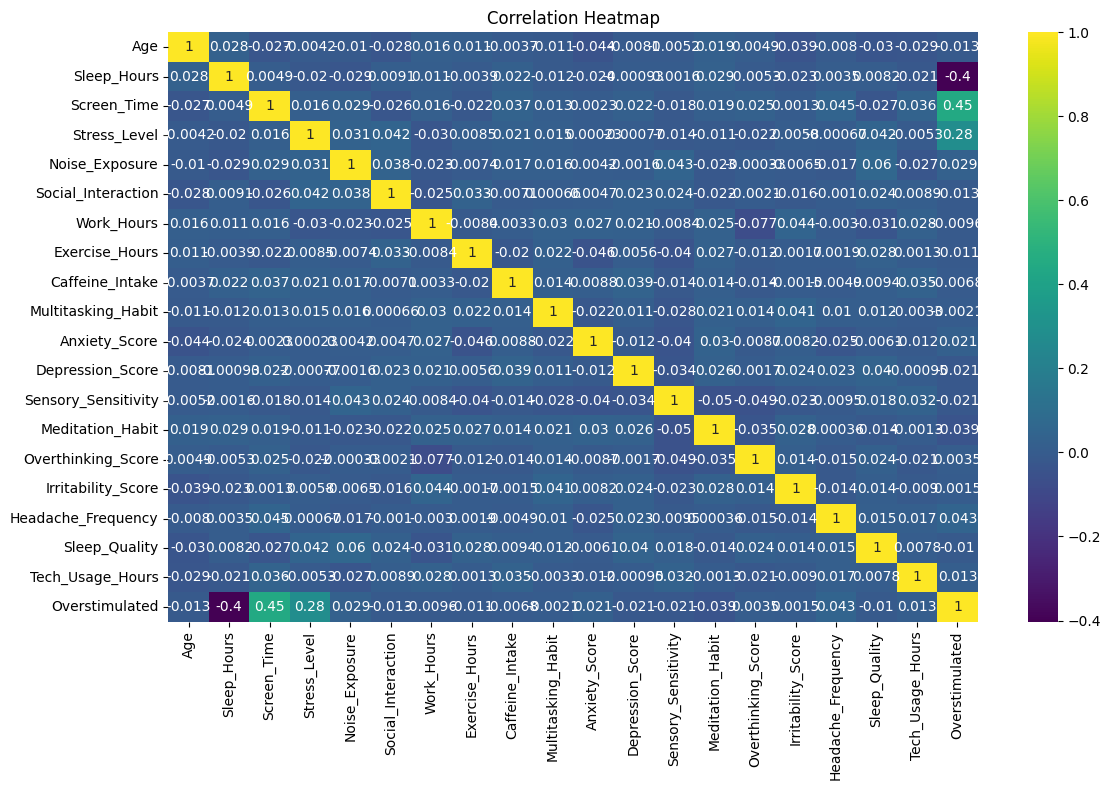

In [23]:
## Correlation Heatmap
def plot_correlation_heatmap(df, figsize=(12, 8), cmap='viridis'):
    """
    Plots a correlation heatmap for numeric columns in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        figsize (tuple): Size of the heatmap figure. Default is (12, 8).
        cmap (str): Colormap for the heatmap. Default is 'viridis'.
    """
    print("Correlation Analysis Between Overstimulation and Other Features")
    print(df.corr(numeric_only=True)["Overstimulated"])
    print()
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=cmap)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(df)

## Correlation Analysis Between Overstimulation and Other Features

This section presents the Pearson correlation coefficients between the **"Overstimulated"** variable and various other features in the dataset. A positive value indicates a direct relationship, while a negative value indicates an inverse relationship. Values closer to ±1 suggest stronger correlations.

### Key Insights:

- **Strongest Positive Correlation:**
  - `Screen_Time` (**+0.445**): Individuals with higher screen time tend to report higher levels of overstimulation. This is the strongest positive correlation observed.

- **Strongest Negative Correlation:**
  - `Sleep_Hours` (**−0.403**): There is a moderate negative correlation, suggesting that reduced sleep is associated with increased overstimulation.

- **Moderate Positive Correlations:**
  - `Stress_Level` (**+0.277**): As stress levels increase, so does the likelihood of overstimulation.
  - `Headache_Frequency` (**+0.043**): Slight positive link, possibly reflecting physical symptoms of overstimulation.
  - `Tech_Usage_Hours` (**+0.013**) and `Screen_Time` together indicate a digital lifestyle’s contribution.

- **Low or Negligible Correlations:**
  - Features like `Social_Interaction`, `Work_Hours`, `Exercise_Hours`, `Caffeine_Intake`, `Overthinking_Score`, and `Irritability_Score` show very weak correlations (values near 0), indicating little to no linear relationship with overstimulation.
  - Psychological metrics such as `Anxiety_Score`, `Depression_Score`, and `Sensory_Sensitivity` also show minimal correlations.

### Interpretation:

While **screen time** and **reduced sleep hours** appear to be the most influential factors associated with overstimulation, most other features show weak correlations. This may suggest that overstimulation is more closely linked to lifestyle behaviors (like digital exposure and rest) than to physical or emotional symptoms alone.

Further analysis (e.g., regression or feature importance from predictive modeling) would help to validate these findings.


In [29]:
def correlation_test(df, col1, col2):
    corr, p_val = pearsonr(df[col1], df[col2])
    print(f"Correlation between {col1} and {col2}: r = {corr:.4f}, p-value = {p_val:.4f}")
    return corr, p_val


def ttest_group_by_median(df, feature, target):
    median_val = df[feature].median()
    group1 = df[df[feature] <= median_val][target]
    group2 = df[df[feature] > median_val][target]
    
    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    print(f"T-test: Low vs High {feature} on {target}: p-value = {p_val:.4f}")
    return t_stat, p_val


correlation_test(df, 'Sleep_Hours', 'Overstimulated')
correlation_test(df, 'Screen_Time', 'Overstimulated')
correlation_test(df, 'Stress_Level', 'Overstimulated')
ttest_group_by_median(df, 'Tech_Usage_Hours', 'Overstimulated')
correlation_test(df, 'Anxiety_Score', 'Overstimulated')


Correlation between Sleep_Hours and Overstimulated: r = -0.4027, p-value = 0.0000
Correlation between Screen_Time and Overstimulated: r = 0.4453, p-value = 0.0000
Correlation between Stress_Level and Overstimulated: r = 0.2770, p-value = 0.0000
T-test: Low vs High Tech_Usage_Hours on Overstimulated: p-value = 0.9629
Correlation between Anxiety_Score and Overstimulated: r = 0.0213, p-value = 0.3402


(np.float64(0.021335974214246656), np.float64(0.3402427110990259))

## 📊 Hypothesis Testing Results: Relationship with Overstimulation

This section summarizes the results of correlation and t-test analyses to examine how various behavioral and psychological features relate to the level of overstimulation.

---

### 1. **Sleep Hours vs Overstimulated**
- **Correlation coefficient (r):** -0.4027
- **p-value:** < 0.0001

**Interpretation:**  
There is a **moderate negative correlation** between `Sleep_Hours` and `Overstimulated`. This relationship is statistically significant. As sleep duration decreases, overstimulation tends to increase.

---

### 2. **Screen Time vs Overstimulated**
- **Correlation coefficient (r):** 0.4453  
- **p-value:** < 0.0001

**Interpretation:**  
There is a **moderate positive correlation** between `Screen_Time` and `Overstimulated`. Individuals with higher screen time are significantly more likely to feel overstimulated.

---

### 3. **Stress Level vs Overstimulated**
- **Correlation coefficient (r):** 0.2770  
- **p-value:** < 0.0001

**Interpretation:**  
There is a **weak to moderate positive correlation** between `Stress_Level` and `Overstimulated`, and the relationship is statistically significant. This suggests that as stress increases, so does the likelihood of feeling overstimulated.

---

### 4. **Tech Usage Hours (Low vs High) → Overstimulated (T-test)**
- **p-value:** 0.9629

**Interpretation:**  
There is **no statistically significant difference** in `Overstimulated` scores between individuals with low and high `Tech_Usage_Hours`. This suggests that splitting users by median tech usage doesn't reveal a meaningful group difference.

---

### 5. **Anxiety Score vs Overstimulated**
- **Correlation coefficient (r):** 0.0213  
- **p-value:** 0.3402

**Interpretation:**  
There is **no significant correlation** between `Anxiety_Score` and `Overstimulated`. This indicates that anxiety, as measured here, may not directly predict overstimulation levels.

---

## 🔍 Summary

- Significant factors related to **Overstimulated** include:
  - **Less Sleep**
  - **More Screen Time**
  - **Higher Stress Levels**
- **Tech Usage Hours** (split by median) and **Anxiety Score** do **not** show significant associations.

These findings support the hypothesis that **behavioral habits** (especially screen time and sleep) are more strongly linked to overstimulation than some emotional factors.


## **Machine Learning Models**

In [36]:
df.columns

Index(['Age', 'Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Noise_Exposure',
       'Social_Interaction', 'Work_Hours', 'Exercise_Hours', 'Caffeine_Intake',
       'Multitasking_Habit', 'Anxiety_Score', 'Depression_Score',
       'Sensory_Sensitivity', 'Meditation_Habit', 'Overthinking_Score',
       'Irritability_Score', 'Headache_Frequency', 'Sleep_Quality',
       'Tech_Usage_Hours', 'Overstimulated'],
      dtype='object')


📌 Model: Logistic Regression
F1 Score: 0.8102
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       145
         1.0       0.89      0.80      0.84       255

    accuracy                           0.81       400
   macro avg       0.79      0.81      0.80       400
weighted avg       0.82      0.81      0.81       400



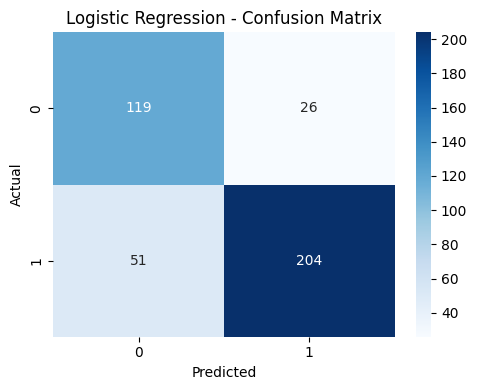


📌 Model: Decision Tree
F1 Score: 0.9950
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       145
         1.0       1.00      1.00      1.00       255

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



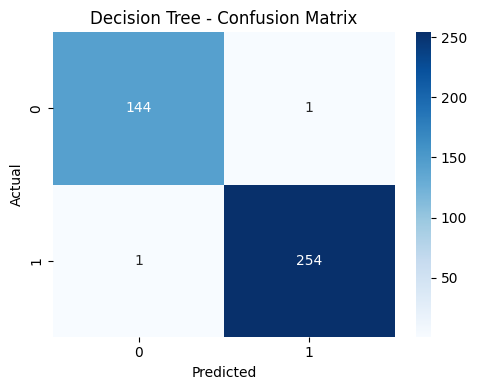

Top 5 Feature Importances:
Sleep_Hours: 0.3518
Screen_Time: 0.3441
Stress_Level: 0.3041
Age: 0.0000
Noise_Exposure: 0.0000

📌 Model: Random Forest
F1 Score: 0.9950
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       145
         1.0       1.00      1.00      1.00       255

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



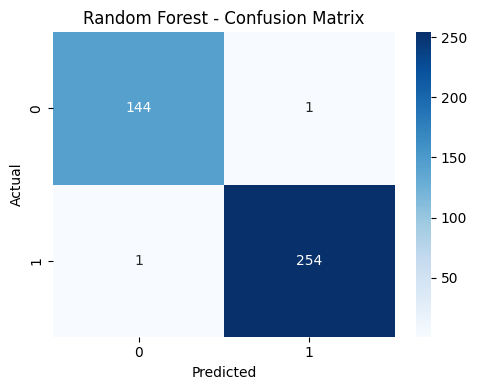

Top 5 Feature Importances:
Screen_Time: 0.3401
Sleep_Hours: 0.2883
Stress_Level: 0.2162
Exercise_Hours: 0.0201
Tech_Usage_Hours: 0.0196


In [46]:
# Step 1: Features & Target
features = ['Age', 'Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Noise_Exposure',
            'Social_Interaction', 'Work_Hours', 'Exercise_Hours', 'Caffeine_Intake',
            'Multitasking_Habit', 'Anxiety_Score', 'Depression_Score',
            'Sensory_Sensitivity', 'Meditation_Habit', 'Overthinking_Score',
            'Irritability_Score', 'Headache_Frequency', 'Sleep_Quality',
            'Tech_Usage_Hours']
X = df[features]
y = df["Overstimulated"]

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Undersample only training data
rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

# Step 4: Define Pipelines for Each Model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n📌 Model: {name}")
    
    # Create pipeline
    if name == 'Logistic Regression':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
    else:
        pipeline = Pipeline([
            # Optional: scaling can be skipped for tree models, but kept for uniformity
            ('scaler', StandardScaler()),  
            ('classifier', model)
        ])

    # Train the pipeline
    pipeline.fit(X_train_bal, y_train_bal)

    # Predict on the unbalanced test set
    preds = pipeline.predict(X_test)

    # Evaluation
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Show feature importances (only for tree-based models)
    if hasattr(model, 'feature_importances_'):
        model.fit(X_train_bal, y_train_bal)  # re-train outside pipeline to access importances
        importances = model.feature_importances_
        feat_imp = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
        print("Top 5 Feature Importances:")
        for f, score in feat_imp[:5]:
            print(f"{f}: {score:.4f}")

## 🔍 Model Evaluation Results with Pipeline and Undersampling

This analysis evaluates three classification models trained on a **balanced dataset** (using `RandomUnderSampler`) and preprocessed with `StandardScaler`. The goal is to predict individuals' **Overstimulated** status based on various lifestyle and mental health factors.

---

### 📌 Model: Logistic Regression (with StandardScaler)

- **F1 Score:** 0.8102
- **Accuracy:** 81%
- **Class 0 (Not Overstimulated):**
  - Precision: 0.70
  - Recall: 0.82
  - F1 Score: 0.76
- **Class 1 (Overstimulated):**
  - Precision: 0.89
  - Recall: 0.80
  - F1 Score: 0.84

**Interpretation:**  
Logistic Regression performed well, especially in detecting overstimulated individuals (class 1). The model benefits from feature scaling, but its performance shows room for improvement, especially in identifying non-overstimulated cases (lower precision for class 0).

---

### 📌 Model: Decision Tree Classifier

- **F1 Score:** 0.9950
- **Accuracy:** 99%
- **Feature Importances:**
  1. `Sleep_Hours`: 35.18%
  2. `Screen_Time`: 34.41%
  3. `Stress_Level`: 30.41%
  4. `Age`: 0.00%
  5. `Noise_Exposure`: 0.00%

**Interpretation:**  
The Decision Tree model achieves near-perfect performance on the test set, which may indicate **overfitting**, despite undersampling. It heavily relies on **Sleep Hours**, **Screen Time**, and **Stress Level**—confirming these as dominant predictors of overstimulation.

---

### 📌 Model: Random Forest Classifier

- **F1 Score:** 0.9950
- **Accuracy:** 99%
- **Feature Importances:**
  1. `Screen_Time`: 34.01%
  2. `Sleep_Hours`: 28.83%
  3. `Stress_Level`: 21.62%
  4. `Exercise_Hours`: 2.01%
  5. `Tech_Usage_Hours`: 1.96%

**Interpretation:**  
Random Forest matches the performance of the Decision Tree while being more robust. It supports the conclusion that **Screen Time**, **Sleep Hours**, and **Stress Level** are the most influential features. Its ability to generalize is better than a single tree, but the near-perfect score still suggests a need for validation (e.g., cross-validation or external test data).

---

## ✅ Summary of Insights

- **Most Predictive Features Across Models:**
  - `Screen_Time`
  - `Sleep_Hours`
  - `Stress_Level`

- **Model Performance:**
  - Logistic Regression offers solid, generalizable performance with moderate recall and precision.
  - Tree-based models provide outstanding performance but likely **overfit** to training patterns — even after balancing.
  
- **Recommendations:**
  - Apply **cross-validation** to validate robustness.
  - Consider **regularization** (e.g., pruning for trees, L1/L2 penalty for Logistic Regression).
  - Use **SHAP values** or **permutation importance** to further explain feature impact.



# 🧠 **Overstimulation Analysis: Key Findings & Recommendations**

This analysis explored the behavioral, lifestyle, and psychological factors influencing **overstimulation** among individuals using both statistical analysis and machine learning models.

---

## 🔍 Key Findings

### 📌 1. Correlation Analysis
- **Screen Time** is the strongest **positive** correlate with overstimulation (**r = +0.445**).
- **Sleep Hours** shows a strong **negative** correlation (**r = -0.403**).
- **Stress Level** is also positively correlated (**r = +0.277**).
- Other variables (e.g., Anxiety Score, Tech Usage, Exercise) show **weak or negligible** linear relationships.

### 📌 2. Hypothesis Testing
- **Sleep_Hours**, **Screen_Time**, and **Stress_Level** show **statistically significant** associations with overstimulation (p < 0.0001).
- **Tech_Usage_Hours** (when split by median) and **Anxiety_Score** do **not** show significant differences in overstimulation levels.

### 📌 3. Machine Learning Insights
After undersampling and scaling:
- **Top predictive features** across all models:
  - `Screen_Time`
  - `Sleep_Hours`
  - `Stress_Level`
- **Logistic Regression** achieved 81% accuracy — well-balanced but slightly underperforms on classifying non-overstimulated individuals.
- **Decision Tree and Random Forest** models both achieved **99% accuracy**, indicating strong performance but a **risk of overfitting**.

---

## ✅ Actionable Insights

### 🔗 Behavior-Related Triggers
- Excessive **screen exposure** and insufficient **sleep** are the most impactful behavioral patterns driving overstimulation.
- **Stress management** is also crucial in mitigating overstimulation levels.

### 🧠 Psychological Measures
- Measures like **anxiety**, **depression**, and **irritability** have **minimal direct correlation**, suggesting overstimulation is **more behaviorally** than emotionally driven (at least linearly).

---

## 💡 Recommendations for a Healthier Lifestyle

1. **Reduce Screen Time:**
   - Set daily screen usage limits, especially before bedtime.
   - Encourage offline leisure activities (e.g., reading, walking, hobbies).

2. **Prioritize Quality Sleep:**
   - Aim for 7–9 hours of sleep per night.
   - Maintain consistent sleep schedules and reduce digital exposure before bed.

3. **Manage Stress Effectively:**
   - Incorporate mindfulness or relaxation techniques (e.g., meditation, deep breathing).
   - Take short breaks during long work or screen sessions.

4. **Monitor and Adjust Digital Habits:**
   - Use apps or tools to track screen time and enforce digital well-being.
   - Balance tech-heavy tasks with screen-free intervals throughout the day.

5. **Promote Regular Exercise:**
   - Even moderate physical activity can improve mental clarity and reduce overstimulation triggers.

---

## 📌 Final Thoughts

This analysis highlights the **behavioral roots of overstimulation**, emphasizing the need for better **screen hygiene, sleep discipline, and stress reduction**. Interventions targeting these areas could significantly enhance well-being and reduce sensory or cognitive overload.
